In [1]:
from sklearn.datasets import make_classification

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.3], flip_y=0, random_state=1)

Counter({1: 7000, 0: 3000})


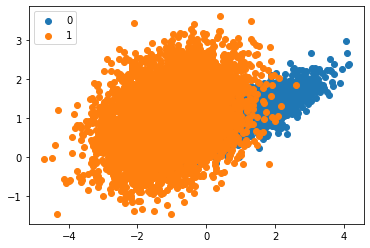

In [2]:
from matplotlib import pyplot as plt
from numpy import where
from collections import Counter

counter = Counter(y)
print(counter)

def plot_points(counter):
    # scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    plt.legend()
    plt.show()
    
plot_points(counter)

In [3]:
import imblearn
print(imblearn.__version__)

0.8.1


In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

def logistic_regression(X,y):
    # Train a logistic regression model using the balanced class weights 

    default_log_reg = LogisticRegression(class_weight=None)
    balanced_log_reg = LogisticRegression(class_weight='balanced')

    # Important to use a stratified K folds to make sure representative proportion of minority examples are used in each fold
    cv = StratifiedKFold(n_splits=5, shuffle=True)

    scores = cross_val_score(estimator=default_log_reg, X=X, y=y, cv=cv, scoring='accuracy')
    def_log_reg_acc = np.mean(scores)

    scores = cross_val_score(estimator=balanced_log_reg, X=X, y=y, cv=cv, scoring='accuracy')
    bal_log_reg_acc = np.mean(scores)

    scores = cross_val_score(estimator=default_log_reg, X=X, y=y, cv=cv, scoring='roc_auc')
    def_log_reg_roc = np.mean(scores)

    scores = cross_val_score(estimator=balanced_log_reg, X=X, y=y, cv=cv, scoring='roc_auc')
    bal_log_reg_roc = np.mean(scores)

    print("Default logistic regression accuracy  =", '{:.6f}, AUC = {:.6f}'.format(def_log_reg_acc, def_log_reg_roc))
    print("Balanced logistic regression accuracy =", '{:.6f}, AUC = {:.6f}'.format(bal_log_reg_acc, bal_log_reg_roc))

In [5]:
logistic_regression(X,y)

Default logistic regression accuracy  = 0.901100, AUC = 0.958874
Balanced logistic regression accuracy = 0.889800, AUC = 0.958713


Counter({0: 3000, 1: 3000})


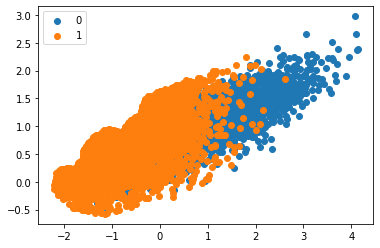

Default logistic regression accuracy  = 0.841833, AUC = 0.914426
Balanced logistic regression accuracy = 0.840167, AUC = 0.914717


In [45]:
# NearMiss-1
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=1, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({0: 3000, 1: 3000})


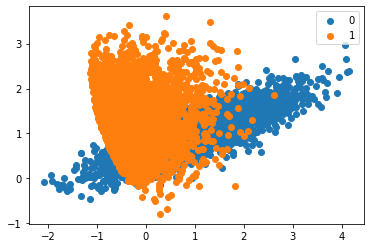

Default logistic regression accuracy  = 0.851333, AUC = 0.919037
Balanced logistic regression accuracy = 0.851333, AUC = 0.918826


In [49]:
# NearMiss-2
from imblearn.under_sampling import NearMiss

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.3], flip_y=0, random_state=1)

undersample = NearMiss(version=2, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({0: 3000, 1: 1172})


/home/samyak/.local/lib/python3.8/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:175: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


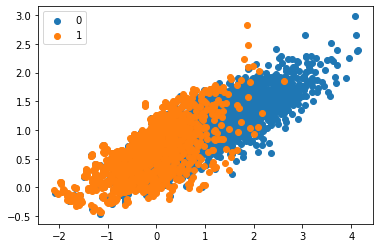

Default logistic regression accuracy  = 0.776372, AUC = 0.826334
Balanced logistic regression accuracy = 0.751674, AUC = 0.826471


In [50]:
# NearMiss-3
from imblearn.under_sampling import NearMiss

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.3], flip_y=0, random_state=1)

undersample = NearMiss(version=3, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({0: 3000, 1: 1003})


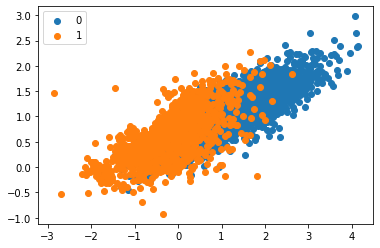

Default logistic regression accuracy  = 0.804646, AUC = 0.836008
Balanced logistic regression accuracy = 0.758678, AUC = 0.834967


In [46]:
from imblearn.under_sampling import CondensedNearestNeighbour

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.3], flip_y=0, random_state=1)

undersample = CondensedNearestNeighbour(n_neighbors=1)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({1: 6607, 0: 3000})


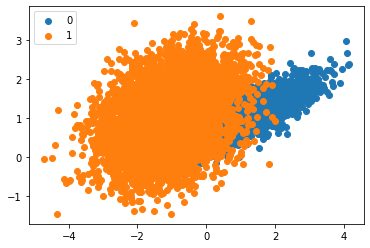

Default logistic regression accuracy  = 0.915895, AUC = 0.969287
Balanced logistic regression accuracy = 0.908296, AUC = 0.969190


In [47]:
from imblearn.under_sampling import TomekLinks

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.3], flip_y=0, random_state=1)
undersample = TomekLinks()
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({0: 3000, 1: 1792})


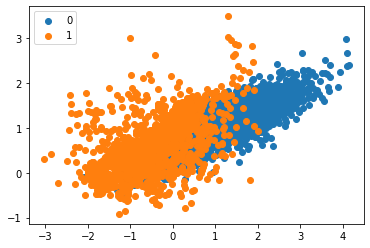

Default logistic regression accuracy  = 0.835774, AUC = 0.905640
Balanced logistic regression accuracy = 0.830759, AUC = 0.906236


In [48]:
from imblearn.under_sampling import OneSidedSelection

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.3], flip_y=0, random_state=1)
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)